In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 


#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/marialysak/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    salary_median=('salary_year_avg', 'median')
)
skill_stats =skill_stats.sort_values(by='skill_count', ascending=False).head(10)

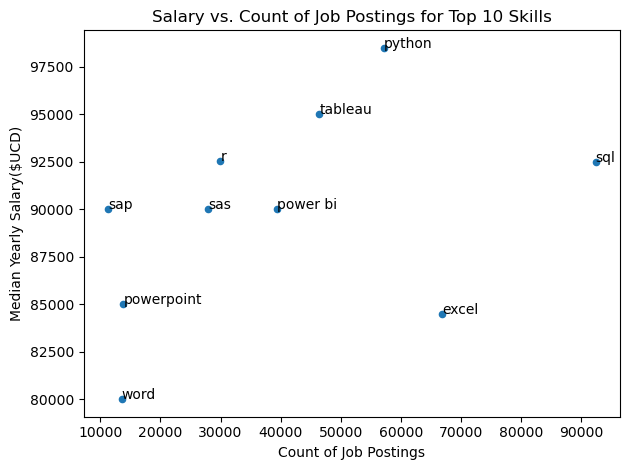

In [27]:
skill_stats.plot(kind='scatter', x='skill_count', y='salary_median')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.ylabel('Median Yearly Salary($UCD)')
plt.xlabel('Count of Job Postings')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['salary_median'].iloc[i], txt)
plt.show()